In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('healthy_lifestyle_city_2021.csv')


In [14]:

df.head(5)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   City                                    44 non-null     object
 1   Rank                                    44 non-null     object
 2   Sunshine hours(City)                    44 non-null     object
 3   Cost of a bottle of water(City)         44 non-null     object
 4   Obesity levels(Country)                 44 non-null     object
 5   Life expectancy(years) (Country)        44 non-null     object
 6   Pollution(Index score) (City)           44 non-null     object
 7   Annual avg. hours worked                44 non-null     object
 8   Happiness levels(Country)               44 non-null     object
 9   Outdoor activities(City)                44 non-null     object
 10  Number of take out places(City)         44 non-null     object
 11  Cost of 

In [24]:
df.describe().T

,count,unique,top,freq
City,44,44,Amsterdam,1
Rank,44,44,1,1
Sunshine hours(City),44,40,1662,3
Cost of a bottle of water(City),44,39,£0.15,2
Obesity levels(Country),44,28,36.20%,6
Life expectancy(years) (Country),44.0,27.0,78.8,6.0
Pollution(Index score) (City),44,44,30.93,1
Annual avg. hours worked,44,23,-,11
Happiness levels(Country),44.0,30.0,6.94,6.0
Outdoor activities(City),44,43,223,2


In [26]:
df.shape

(44, 12)

In [29]:
df.columns.tolist()

['City',
 'Rank',
 'Sunshine hours(City)',
 'Cost of a bottle of water(City)',
 'Obesity levels(Country)',
 'Life expectancy(years) (Country)',
 'Pollution(Index score) (City)',
 'Annual avg. hours worked',
 'Happiness levels(Country)',
 'Outdoor activities(City)',
 'Number of take out places(City)',
 'Cost of a monthly gym membership(City)']

Visualizing the relationship between happiness and life expectancy using scatter plot

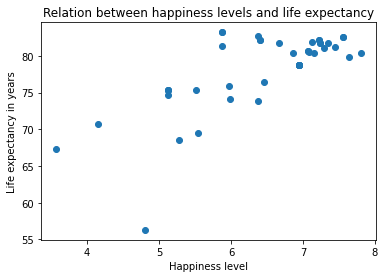

In [31]:
plt.scatter(df['Happiness levels(Country)'], df['Life expectancy(years) (Country)'])
plt.xlabel('Happiness level')
plt.ylabel('Life expectancy in years')
plt.title('Relation between happiness levels and life expectancy')
plt.show()

from the plot we can tell there's some linear relation connecting the 2 variables
I'll try to train a linear regression model for these 2 vars

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dataset is not too big, we will give the train set 15% of the dataset

In [39]:
X = df['Happiness levels(Country)'].values.reshape(-1, 1)  
Y = df['Life expectancy(years) (Country)'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

make model


In [41]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [43]:
# see coefficients
model.coef_, model.intercept_

(array([[4.06572357]]), array([51.73334472]))

R ^ 2

In [49]:
model.score(x_test, y_test)

0.11006568859419552

R ^ 2 value very low

In [46]:
f'Life expectancy model: {model.coef_[0][0]} * happiness + {model.intercept_[0]}'

'Life expectancy model: 4.065723574083313 * happiness + 51.73334471820371'

prediction


In [44]:
prediction = model.predict(x_test)
prediction

array([[79.94946632],
       [72.54984942],
       [79.94946632],
       [82.47021494],
       [77.75397559],
       [72.59050665],
       [77.67266112]])

plotting predicted y values next to test y values


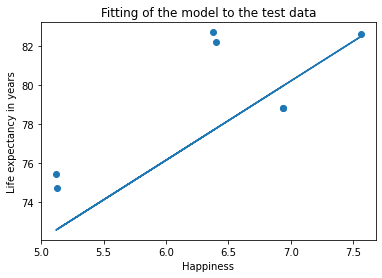

In [51]:
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test))
plt.title('Fitting of the model to the test data')
plt.xlabel('Happiness')
plt.ylabel('Life expectancy in years')
plt.show()

# Multiple linear regression 

In [55]:
df.head(5)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   City                                    44 non-null     object
 1   Rank                                    44 non-null     object
 2   Sunshine hours(City)                    44 non-null     object
 3   Cost of a bottle of water(City)         44 non-null     object
 4   Obesity levels(Country)                 44 non-null     object
 5   Life expectancy(years) (Country)        44 non-null     object
 6   Pollution(Index score) (City)           44 non-null     object
 7   Annual avg. hours worked                44 non-null     object
 8   Happiness levels(Country)               44 non-null     object
 9   Outdoor activities(City)                44 non-null     object
 10  Number of take out places(City)         44 non-null     object
 11  Cost of 

add popultion index score and outdoor activities and number of take out places

need to remove the rows with '-' values for pollution

In [123]:
new_df = df.copy()
new_df = new_df[new_df['Pollution(Index score) (City)'] != '-']
X = new_df.drop(['City',
              'Rank',
              'Sunshine hours(City)',
              'Cost of a bottle of water(City)',
              'Life expectancy(years) (Country)',
              'Outdoor activities(City)',
              'Annual avg. hours worked',
             'Cost of a monthly gym membership(City)'], axis=1)
X['Obesity levels(Country)'] = X['Obesity levels(Country)'].str.strip('%').astype('float') / 100

X.head()


,Obesity levels(Country),Pollution(Index score) (City),Happiness levels(Country),Number of take out places(City)
0,0.204,30.93,7.44,1048
1,0.290,26.86,7.22,1103
2,0.201,17.33,7.29,1008
3,0.206,19.63,7.35,598
4,0.197,21.24,7.64,523


In [114]:
Y = new_df['Life expectancy(years) (Country)'].values.reshape(-1, 1)


In [115]:
model_2 = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [116]:
model_2.fit(x_train, y_train)

LinearRegression()

model coeffs and intercept


In [117]:
model_2.coef_

array([[-1.40553606e+01,  2.76843417e-02,  4.83728855e+00,
         6.02380129e-04]])

In [118]:
model_2.intercept_

array([48.10224579])

model

# Life expectancy = -1.405 * obesity levels (%) + 2.7684 * pollution index score + 4.8372 happiness level + 6.023 * no of takeout places

In [120]:
# R ^ 2
model_2.score(x_test, y_test)

0.3211645073024497

In [121]:
# R ^ 2 slightly higher, still very low

In [132]:
predict = model_2.predict(x_test)
predict

array([[83.19328448],
       [80.54535629],
       [75.32491061],
       [81.30008556],
       [75.18071535],
       [80.35944123],
       [80.03918126],
       [77.67156212],
       [75.51137368]])

In [130]:
#calculate st dev
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predict, y_test)
np.sqrt(mse)

4.050414982237218